In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
!pip install tensorflow

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\nani\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\~umpy\\.libs\\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'c:\users\nani\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.1.0-py2.py3-none-any.whl (147 kB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=be3c248526e9624d7e970a66f3054b5ea4cdd2269bf3d6addfa2127675294ad1
  Stored in directory: c:\users\nani\appdata\local\pip\cache\wheels\3f\e3\ec\8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2
  Created wheel for wrapt: filename=wrapt-1.12.1-py3-none-any.whl size=19553 sha256=b5d565b6789a1e62b5aa541c34b8dce5c98df8855267ce90b7b29f58969ad380
  Stored in directory: c:\users\nani\appdata\local\pip\cache\wheels\62\76\4c\aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built termcolor wrapt
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.1
    Uninstalling numpy-1.19.1:
      Successfully uninstalled numpy-1.19.1


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

ModuleNotFoundError: No module named 'tensorflow'

In [5]:
!pip install tensorflow

You should consider upgrading via the 'c:\users\nani\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.



  Using cached tensorflow-2.4.1-cp37-cp37m-win_amd64.whl (370.7 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
  Using cached protobuf-3.14.0-cp37-cp37m-win_amd64.whl (798 kB)
  Using cached absl_py-0.11.0-py3-none-any.whl (127 kB)
  Using cached tensorboard-2.4.1-py3-none-any.whl (10.6 MB)
  Using cached grpcio-1.32.0-cp37-cp37m-win_amd64.whl (2.5 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
Processing c:\users\nani\appdata\local\pip\cache\wheels\3f\e3\ec\8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2\termcolor-1.1.0-py3-none-any.whl
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached h5py-2.10.0-cp37-cp37m-win_amd64.whl (2.5 MB)
Processing c:\users\nani\appdata\local\pip\cache\wheels\62\76\4c\aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6\wrapt-1.12.1-py3-none-any.whl
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached 

In [6]:
import tensorflow as tf

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
from os import getcwd

In [9]:
#Reading the Data sets

data_train=pd.read_csv('sign_mnist_train.csv')
data_test=pd.read_csv('sign_mnist_test.csv')

In [10]:
training_images = data_train.iloc[:,1:].values
training_labels = data_train.iloc[:,0].values


In [11]:
testing_images = data_test.iloc[:,1:].values
testing_labels = data_test.iloc[:,0].values

In [12]:
training_images = training_images.reshape(-1,28,28,1)
testing_images = testing_images.reshape(-1,28,28,1)

In [13]:
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28, 1)
(27455,)
(7172, 28, 28, 1)
(7172,)


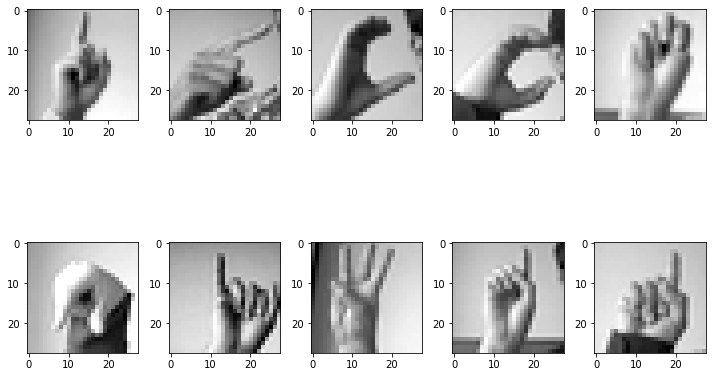

In [16]:
import matplotlib.pyplot as plt



# Plotting the first 10 images 
fig, ax = plt.subplots(2,5) 
fig.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(training_images[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()

In [17]:
# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [18]:
validation_datagen = ImageDataGenerator(
    rescale=1 / 255
)

In [19]:
print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

In [21]:
# Compile Model. 
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [22]:
# Train the Model
history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=10,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)



model.evaluate(testing_images, testing_labels, verbose=0)

c:\users\nani\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
857/857 [==============================] - 27s 31ms/step - loss: 2.9760 - accuracy: 0.1087 - val_loss: 1.8674 - val_accuracy: 0.3539
Epoch 2/10
857/857 [==============================] - 24s 28ms/step - loss: 2.0121 - accuracy: 0.3610 - val_loss: 1.2327 - val_accuracy: 0.5784
Epoch 3/10
857/857 [==============================] - 23s 26ms/step - loss: 1.5876 - accuracy: 0.4889 - val_loss: 0.8945 - val_accuracy: 0.6861
Epoch 4/10
857/857 [==============================] - 23s 27ms/step - loss: 1.3015 - accuracy: 0.5707 - val_loss: 0.8653 - val_accuracy: 0.7073
Epoch 5/10
857/857 [==============================] - 22s 26ms/step - loss: 1.0952 - accuracy: 0.6374 - val_loss: 0.6088 - val_accuracy: 0.7758
Epoch 6/10
857/857 [==============================] - 22s 26ms/step - loss: 0.9473 - accuracy: 0.6816 - val_loss: 0.5332 - val_accuracy: 0.7922
Epoch 7/10
857/857 [==============================] - 23s 27ms/step - loss: 0.8536 - accuracy: 0.7139 - val_loss: 0.4442 - val_accuracy:

[109.38264465332031, 0.6981316208839417]

In [23]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

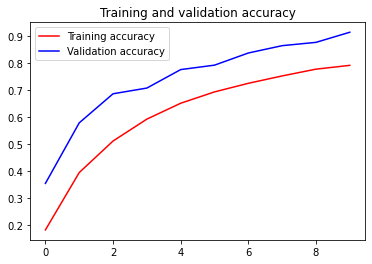

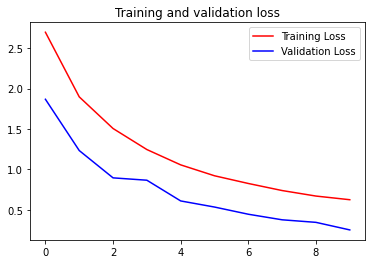

In [24]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()